In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_path="/home/bibek/Desktop/Project_Sem_8/Projects/Data/train/"
test_path="/home/bibek/Desktop/Project_Sem_8/Projects/Data/test/"

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,MaxPool2D,Conv2D,Dropout,Flatten
from keras.models import Sequential
from keras.applications import vgg16

In [4]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.compat.v1.Session(config=config)

2022-03-19 13:28:07.836814: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-19 13:28:07.912996: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-19 13:28:07.951611: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-19 13:28:07.952003: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

In [5]:
train_data_gen=ImageDataGenerator(rescale=1./255,
                                  horizontal_flip=True,
                                  zoom_range=0.2,
                                 shear_range=0.3)
training_set=train_data_gen.flow_from_directory(directory=train_path,
                                                target_size=(64,64),
                                                class_mode='binary')

Found 1726 images belonging to 2 classes.


In [6]:
training_set.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [7]:
test_data_gen=ImageDataGenerator(rescale=1./255)
testing_set=test_data_gen.flow_from_directory(directory=test_path,
                                              target_size=(64,64))
                                         

Found 433 images belonging to 2 classes.


In [8]:
testing_set.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [9]:
class_type={0:'Covid',1:'Normal'}

In [10]:
import glob
import matplotlib.image as img
path_covid=list(glob.glob(test_path+"COVID19/"+"/*"))
path_normal=list(glob.glob(test_path+"NORMAL/"+"/*"))

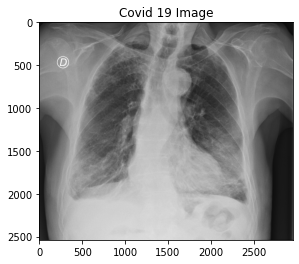

In [11]:
plt.title("Covid 19 Image")
covid_image_sample=img.imread(path_covid[0])
plt.imshow(covid_image_sample)

AxesImage(54,36;334.8x217.44)


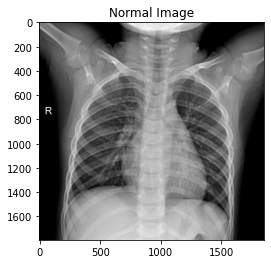

In [12]:
plt.title("Normal Image")
normal_image_sample=img.imread(path_normal[0])
print(plt.imshow(normal_image_sample))

#### CNN Architecture

In [13]:
model=Sequential()
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
# model.add(MaxPool2D())
# model.add(Dropout(0.15))

2022-03-19 13:28:20.714156: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-19 13:28:20.714456: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-19 13:28:20.714666: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-19 13:28:20.715022: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-19 13:28:20.715237: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from S

In [14]:
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.5))

In [15]:
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.15))

In [16]:
model.add(Flatten())
model.add(Dense(256,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [17]:
from tensorflow.keras.optimizers import Adam
# opt = SGD(lr=0.001)
opt = Adam(lr=0.003, beta_1=0.9, beta_2=0.999,
                     epsilon=0.1, decay=0.0)
model.compile(loss = "binary_crossentropy", optimizer = opt,metrics=['accuracy'])

In [18]:
# model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       7

In [20]:
hist=model.fit(training_set, 
                    steps_per_epoch= 8, 
                    epochs= 10,
                    validation_data= testing_set)

Epoch 1/10


2022-03-19 13:28:33.870642: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8202


8/8 [==============================] - 15s 1s/step - loss: 0.6554 - accuracy: 0.7598 - val_loss: 0.6941 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 10s 1s/step - loss: 0.6313 - accuracy: 0.7283 - val_loss: 0.6991 - val_accuracy: 0.5000
Epoch 3/10
8/8 [==============================] - 10s 1s/step - loss: 0.5901 - accuracy: 0.7539 - val_loss: 0.7103 - val_accuracy: 0.5000
Epoch 4/10
8/8 [==============================] - 10s 1s/step - loss: 0.5707 - accuracy: 0.7422 - val_loss: 0.7262 - val_accuracy: 0.5000
Epoch 5/10
8/8 [==============================] - 10s 1s/step - loss: 0.5277 - accuracy: 0.7734 - val_loss: 0.7492 - val_accuracy: 0.5000
Epoch 6/10
8/8 [==============================] - 10s 1s/step - loss: 0.5377 - accuracy: 0.7578 - val_loss: 0.7608 - val_accuracy: 0.5000
Epoch 7/10
8/8 [==============================] - 10s 1s/step - loss: 0.5563 - accuracy: 0.7422 - val_loss: 0.7567 - val_accuracy: 0.5000
Epoch 8/10
8/8 [=============================

In [21]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

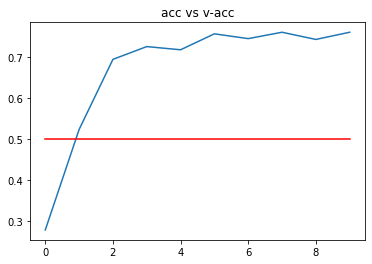

In [23]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

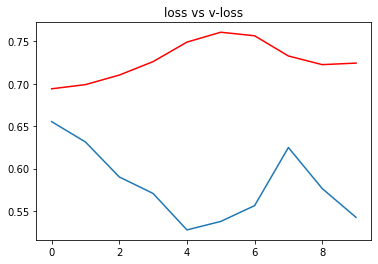

In [22]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()